### Comparison of Models' Performance

In this section, we will compare the performance of different models, including:
* linear regression,
* random forest,
* neural network.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data

Let's retrieve the summaries concerning the models' performance that we obtained earlier.


In [2]:
# load the models' metrics
LM_scores = pd.read_csv('LM_scores.csv', index_col=['Set', 'Scoring'])
RF_scores = pd.read_csv('RF_scores.csv', index_col=['Set', 'Scoring'])
NN_scores = pd.read_csv('NN_scores.csv', index_col=['Set', 'Scoring'])

#### 1. Linear Regression

Let's visualize the data obtained from the linear regression model.

In [3]:
# select Adjusted R2 values together with std values
metrics_test = LM_scores.loc[(LM_scores.index.get_level_values(0) == 'Test')&(LM_scores.index.get_level_values(1).isin(['Adjusted R2', 'CV_R2_std']))].droplevel(0).T
metrics_test['Set'] = 'Test'
metrics_train = LM_scores.loc[(LM_scores.index.get_level_values(0) == 'Train')&(LM_scores.index.get_level_values(1).isin(['Adjusted R2', 'CV_R2_std']))].droplevel(0).T
metrics_train['Set'] = 'Train'
LM_metrics = pd.concat([metrics_train, metrics_test])

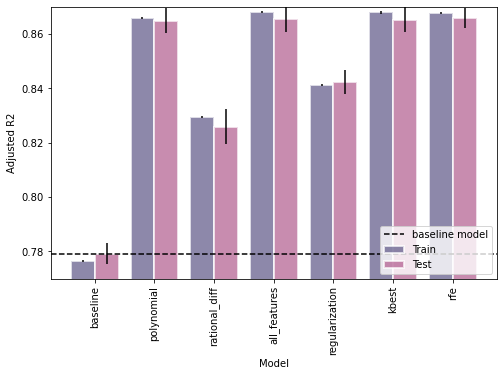

In [4]:
# set the figure size
plt.figure(figsize=(8, 5))

# define color palette
palette = ["#58508d", "#bc5090", "#F7AD19", "#ffa600", "#4CC9F0"]

# create a bar plot, calculate x and y coordinates for error bars and add errror bars
ax = sns.barplot(data=LM_metrics, x=LM_metrics.index, y='Adjusted R2', hue='Set', palette=palette, edgecolor='white', linewidth=2, saturation=0.8, alpha=0.7)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=LM_metrics['CV_R2_std'], fmt="none", c="k")

# Add a horizontal line at a specific y-value (adjust the y-value as needed)
ax.axhline(y=LM_metrics.loc['baseline', 'Adjusted R2'].values[1], color='black', linestyle='--', label='baseline model')

# add labels, set limits and ticks
plt.xlabel('Model') 
plt.ylabel('Adjusted R2') 
plt.ylim(0.77, 0.87)
plt.xticks(rotation=90)
plt.legend()
plt.legend(loc='lower right')

# Show the plot
plt.show()

After **incorporating polynomial features**, we observe a substantial improvement in the model's performance, **effectively transforming our linear regression model into a polynomial regression**.

Furthermore, it's evident that the **model isn't overfitting**, as both the training and test sets exhibit similar performance, and employing feature selection failed to enhance the model's performance.

To **compare all models**, we will consider the **baseline** model without additional features, the model with **polynomial features**, the model with **rational difference features**, and the model with **all features** included.

In [5]:
LM_metrics_selected = LM_metrics.loc[['baseline', 'polynomial', 'rational_diff', 'all_features']]

#### 2. Random Forest

Let's create visualizations of the data from the random forest model to select the best models for comparison.


In [6]:
# select Adjusted R2 values together with std values
metrics_test = RF_scores.loc[(RF_scores.index.get_level_values(0) == 'Test')&(RF_scores.index.get_level_values(1).isin(['Adjusted R2', 'CV_R2_std']))].droplevel(0).T
metrics_test['Set'] = 'Test'
metrics_train = RF_scores.loc[(RF_scores.index.get_level_values(0) == 'Train')&(RF_scores.index.get_level_values(1).isin(['Adjusted R2', 'CV_R2_std']))].droplevel(0).T
metrics_train['Set'] = 'Train'
RF_metrics = pd.concat([metrics_train, metrics_test])

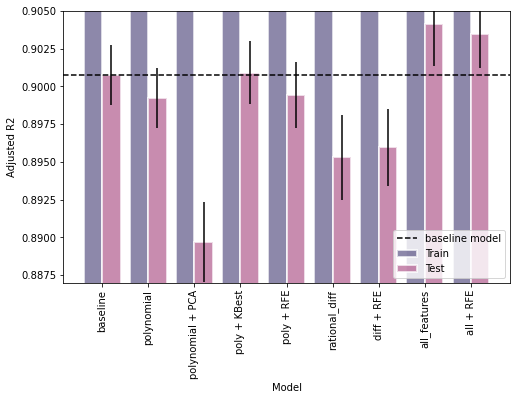

In [7]:
# set the figure size
plt.figure(figsize=(8, 5))

# create a bar plot, calculate x and y coordinates for error bars and add errror bars
ax = sns.barplot(data=RF_metrics, x=RF_metrics.index, y='Adjusted R2', hue='Set', palette=palette, edgecolor='white', linewidth=2, saturation=0.8, alpha=0.7)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=RF_metrics['CV_R2_std'], fmt="none", c="k")

# Add a horizontal line at a specific y-value (adjust the y-value as needed)
ax.axhline(y=RF_metrics.loc['baseline', 'Adjusted R2'].values[1], color='black', linestyle='--', label='baseline model')

# add labels, set limits and ticks
plt.xlabel('Model')  
plt.ylabel('Adjusted R2') 
plt.ylim(0.887, 0.905)
plt.xticks(rotation=90)
plt.legend()
plt.legend(loc='lower right')

# Show the plot
plt.show()

Above, we adjusted the scale to enhance the visualization of performance on the test set, as the scores for the training set are consistently close to 1 across all cases.

Except for polynomial + PCA, all polynomial models exhibit comparable performances. For models incorporating rational difference features, the one employing RFE demonstrated superior performance. Additionally, the model incorporating all features achieved the best results when the number of features was not reduced.

In [8]:
RF_metrics_selected = RF_metrics.loc[['baseline', 'poly + KBest', 'diff + RFE', 'all_features']].rename(index={'poly + KBest':'polynomial', 'diff + RFE':'rational_diff'})

#### 3. Neural Network

Ultimately, we'll visualize the outcomes obtained with the use of the neural network across datasets featuring varying numbers of features.

In [9]:
# select Adjusted R2 values together with std values
metrics_test = NN_scores.loc[(NN_scores.index.get_level_values(0) == 'Test')&(NN_scores.index.get_level_values(1).isin(['Adjusted R2', 'CV_R2_std']))].droplevel(0).T
metrics_test['Set'] = 'Test'
metrics_train = NN_scores.loc[(NN_scores.index.get_level_values(0) == 'Train')&(NN_scores.index.get_level_values(1).isin(['Adjusted R2', 'CV_R2_std']))].droplevel(0).T
metrics_train['Set'] = 'Train'
NN_metrics = pd.concat([metrics_train, metrics_test])

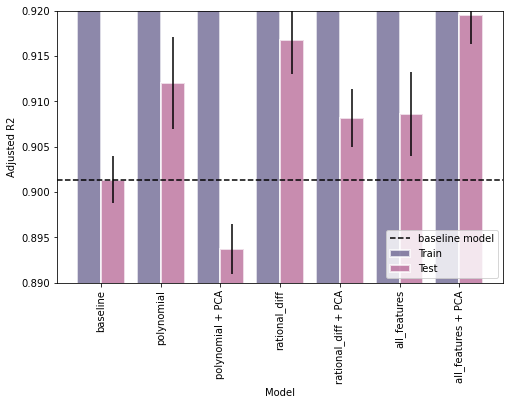

In [10]:
# set the figure size
plt.figure(figsize=(8, 5))

# create a bar plot, calculate x and y coordinates for error bars and add errror bars
ax = sns.barplot(data=NN_metrics, x=NN_metrics.index, y='Adjusted R2', hue='Set', palette=palette, edgecolor='white', linewidth=2, saturation=0.8, alpha=0.7)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=NN_metrics['CV_R2_std'], fmt="none", c="k")

# Add a horizontal line at a specific y-value (adjust the y-value as needed)
ax.axhline(y=NN_metrics.loc['baseline', 'Adjusted R2'].values[1], color='black', linestyle='--', label='baseline model')

# add labels, set limits and ticks
plt.xlabel('Model')  
plt.ylabel('Adjusted R2') 
plt.ylim(0.89, 0.92)
plt.xticks(rotation=90)
plt.legend()
plt.legend(loc='lower right')

# Show the plot
plt.show()

For the neural network, incorporating polynomial and rational difference features proved beneficial. Additionally, in the model with all features included PCA helped mitigate overfitting.

In [11]:
NN_metrics_selected = NN_metrics.copy().loc[['baseline', 'polynomial', 'rational_diff', 'all_features + PCA']].rename(index={'all_features + PCA':'all_features'})

#### 4. Comparison of all models

Let's **compare the performance of all models** and examine the **impact of the engineered features** on their performance.

In [12]:
# Combine the dataframes with keys parameter
combined_df = pd.concat([LM_metrics_selected, RF_metrics_selected, NN_metrics_selected], keys=['LM', 'RF', 'NN'], axis=0)

# Reset index and split into train and test sets
combined_df.reset_index(inplace=True)
metrics_train = combined_df[combined_df['Set'] == 'Train']
metrics_test = combined_df[combined_df['Set'] == 'Test']

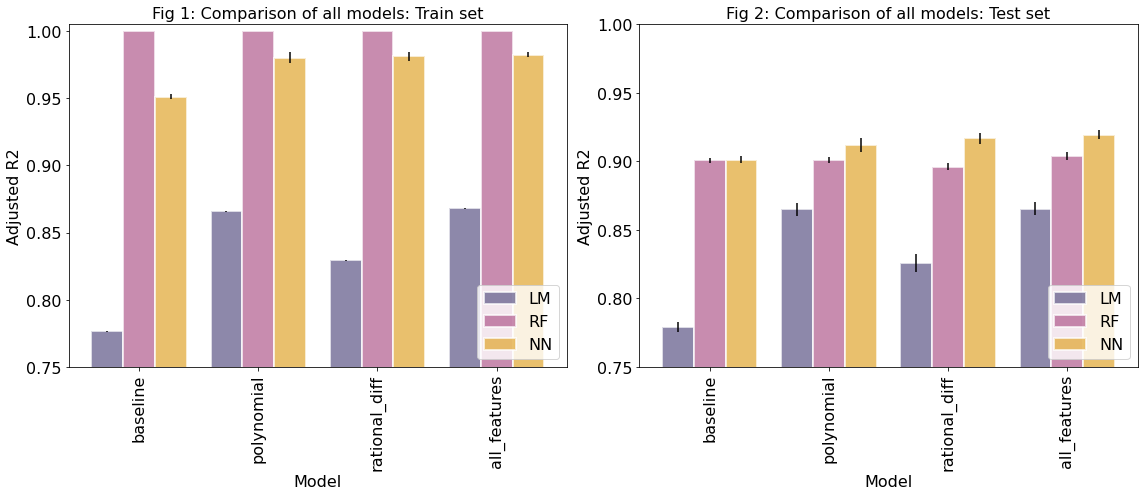

In [13]:
# set the figure size
plt.figure(figsize=(16, 7))

# create the first bar plot with adjusted y-axis limits
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=metrics_train, x='level_1', y='Adjusted R2', hue='level_0', palette=palette, edgecolor='white', linewidth=2, saturation=0.8, alpha=0.7)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax1.patches]
y_coords = [p.get_height() for p in ax1.patches]
ax1.errorbar(x=x_coords, y=y_coords, yerr=metrics_train['CV_R2_std'], fmt="none", c="k")

ax1.set_title('Fig 1: Comparison of all models: Train set', fontsize=16)
plt.xlabel('Model', fontsize=16)  
plt.ylabel('Adjusted R2', fontsize=16) 
plt.ylim(0.75, 1.005)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='lower right', fontsize=16)

# create the second bar plot with different y-axis limits
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=metrics_test, x='level_1', y='Adjusted R2', hue='level_0', palette=palette, edgecolor='white', linewidth=2, saturation=0.8, alpha=0.7)
x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax2.patches]
y_coords = [p.get_height() for p in ax2.patches]
ax2.errorbar(x=x_coords, y=y_coords, yerr=metrics_test['CV_R2_std'], fmt="none", c="k")

ax2.set_title('Fig 2: Comparison of all models: Test set', fontsize=16)
plt.xlabel('Model', fontsize=16)  
plt.ylabel('Adjusted R2', fontsize=16) 
plt.ylim(0.75, 1)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='lower right', fontsize=16)

# Show the plot
plt.tight_layout()
#plt.savefig('comparison_plots.png')
plt.show()

In Figure 1, for the training set, the observations are as follows:
* The linear regression model exhibited inferior performance on the training data but showed the most improvement with the inclusion of engineered features.
* The neural network model performed well on the training data and experienced a slight improvement from the engineered features.
* Random forest surpassed all models on the training data, achieving nearly perfect performance.


In Figure 2, for the test set, the observations are as follows:
* Neural network exhibited the best generalization across all datasets, with random forest scoring slightly lower.
* Linear regression showed significant improvement due to the engineered features. Although neural network performance also saw a slight increase with the incorporation of features, it was less impacted compared to the linear model.
* The performance of random forest remained largely unaffected after the inclusion of engineered features.